# Team Assignment - the descriptive Task

#### First Step: Importing

In [14]:
# ----------- GPU acceleration - use pandas if you don't got a nvidia gpu -----------
import pandas as pd
#import cudf as pd

# install packages with "conda install -c nvidia -c rapidsai -c numba -c conda-forge -c defaults cudf" 
# only on Linux available
# ----------- GPU acceleration - end -----------

import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
sns.set_style("white")
sns.set_palette("GnBu_d")


from datetime import datetime, timedelta

In [242]:
chg17 = pd.read_csv("chicago_2017.csv")

#### Second Step: Validate and review the Data

In [3]:
chg17.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3829014 entries, 0 to 3829013
Data columns (total 8 columns):
 #   Column              Dtype 
---  ------              ----- 
 0   start_time          object
 1   end_time            object
 2   start_station_id    int64 
 3   end_station_id      int64 
 4   start_station_name  object
 5   end_station_name    object
 6   bike_id             int64 
 7   user_type           object
dtypes: int64(3), object(5)
memory usage: 233.7+ MB


In [4]:
# chg17.describe()

In [5]:
chg17.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,3/31/2017 23:59:07,4/1/2017 00:13:24,66,171,Clinton St & Lake St,May St & Cullerton St,5292,Subscriber
1,3/31/2017 23:56:25,4/1/2017 00:00:21,199,26,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,4408,Subscriber
2,3/31/2017 23:55:33,4/1/2017 00:01:21,520,432,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,696,Subscriber
3,3/31/2017 23:54:46,3/31/2017 23:59:34,110,142,Dearborn St & Erie St,McClurg Ct & Erie St,4915,Subscriber
4,3/31/2017 23:53:33,4/1/2017 00:00:28,327,331,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),4247,Subscriber


Let's have a look at empty values

In [6]:
emptyRows = chg17[chg17.isna().any(axis=1)]
emptyRows

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type


In [7]:
countEmptyRows = len(chg17[chg17.isna().any(axis=1)])
print("There are {} empty rows".format(countEmptyRows))

There are 0 empty rows


As you can see, there are none empty Values

## Usage Visualization:

First we aggregate our data and do some calculation before

In [8]:
# Careful, this step takes some minutes
chg17_timeStamps = chg17.copy()
chg17_timeStamps['start_time'] = pd.to_datetime(chg17_timeStamps['start_time'])
chg17_timeStamps['end_time'] = pd.to_datetime(chg17_timeStamps['end_time'])

In [9]:
chg17_timeStamps.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type
0,2017-03-31 23:59:07,2017-04-01 00:13:24,66,171,Clinton St & Lake St,May St & Cullerton St,5292,Subscriber
1,2017-03-31 23:56:25,2017-04-01 00:00:21,199,26,Wabash Ave & Grand Ave,McClurg Ct & Illinois St,4408,Subscriber
2,2017-03-31 23:55:33,2017-04-01 00:01:21,520,432,Greenview Ave & Jarvis Ave,Clark St & Lunt Ave,696,Subscriber
3,2017-03-31 23:54:46,2017-03-31 23:59:34,110,142,Dearborn St & Erie St,McClurg Ct & Erie St,4915,Subscriber
4,2017-03-31 23:53:33,2017-04-01 00:00:28,327,331,Sheffield Ave & Webster Ave,Halsted St & Blackhawk St (*),4247,Subscriber


In [32]:
chg17_timeStamps["date"] = chg17_timeStamps["start_time"].apply(lambda x: x.date()) 
chg17_timeStamps["travel_time"] = chg17_timeStamps["end_time"] - chg17_timeStamps["start_time"]
chg17_timeStamps["hour"] = chg17_timeStamps["start_time"].apply(lambda x: x.hour) 
chg17_timeStamps["weekday"] = chg17_timeStamps["start_time"].apply(lambda x: x.weekday()) 
chg17_timeStamps["week"] = chg17_timeStamps["start_time"].apply(lambda x: x.isocalendar()[1]) 
chg17_timeStamps["month"] = chg17_timeStamps["start_time"].apply(lambda x: x.month) 
chg17_timeStamps.sort_values(["date","bike_id"], inplace = True)

In [196]:
chg17_timeStamps.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,travel_time,hour,weekday,week,month
430052,2017-01-01 20:54:49,2017-01-01 21:04:30,27,302,Larrabee St & North Ave,Sheffield Ave & Wrightwood Ave,8,Subscriber,2017-01-01,0 days 00:09:41,20,6,52,1
431086,2017-01-01 12:38:02,2017-01-01 12:41:07,138,27,Clybourn Ave & Division St,Larrabee St & North Ave,8,Subscriber,2017-01-01,0 days 00:03:05,12,6,52,1
431351,2017-01-01 10:33:57,2017-01-01 10:37:29,27,138,Larrabee St & North Ave,Clybourn Ave & Division St,8,Subscriber,2017-01-01,0 days 00:03:32,10,6,52,1
431246,2017-01-01 11:35:55,2017-01-01 11:57:05,116,88,Western Ave & Winnebago Ave,Racine Ave & Randolph St,27,Customer,2017-01-01,0 days 00:21:10,11,6,52,1
430271,2017-01-01 17:45:56,2017-01-01 18:01:38,231,231,Sheridan Rd & Montrose Ave,Sheridan Rd & Montrose Ave,31,Subscriber,2017-01-01,0 days 00:15:42,17,6,52,1


### Let's take a look at different usages
At first some usage data over the year

In [203]:
chg17_usage = chg17_timeStamps.groupby(["date"])["bike_id"].nunique()
chg17_usage = pd.DataFrame(chg17_usage)

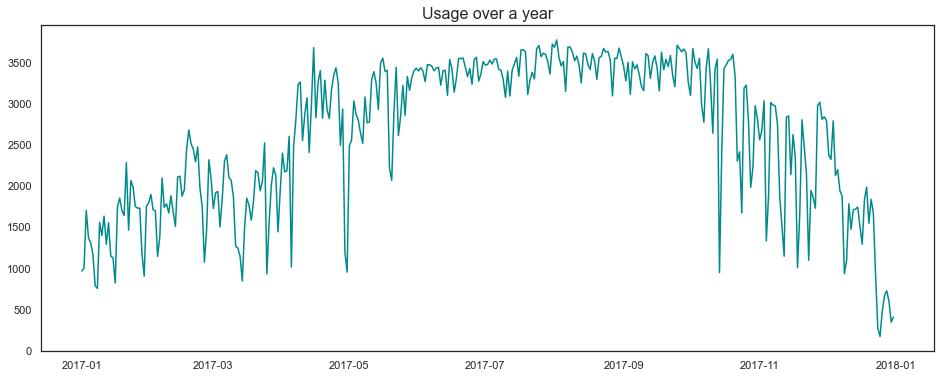

In [208]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(chg17_usage, color='darkcyan')

ax.set_title("Usage over a year", fontsize=16)
plt.show()

Breaking this into our to costumer types: costumer, subscriber.

For simplicity reasons we are grouping by week now

In [209]:
data_range = pd.date_range('2017-01-01', '2017-12-31')

In [238]:
chg17_usage = chg17_timeStamps.groupby(["week"])["bike_id"].count()
chg17_usage = pd.DataFrame(chg17_usage)

In [239]:
chg17_usage_subs = chg17_timeStamps[chg17_timeStamps["user_type"]=="Subscriber"].groupby(["week"])["bike_id"].count()
chg17_usage_subs = pd.DataFrame(chg17_usage_subs)

In [240]:
chg17_usage_costu = chg17_timeStamps[chg17_timeStamps["user_type"]=="Customer"].groupby(["week"])["bike_id"].count()
chg17_usage_costu = pd.DataFrame(chg17_usage_costu)

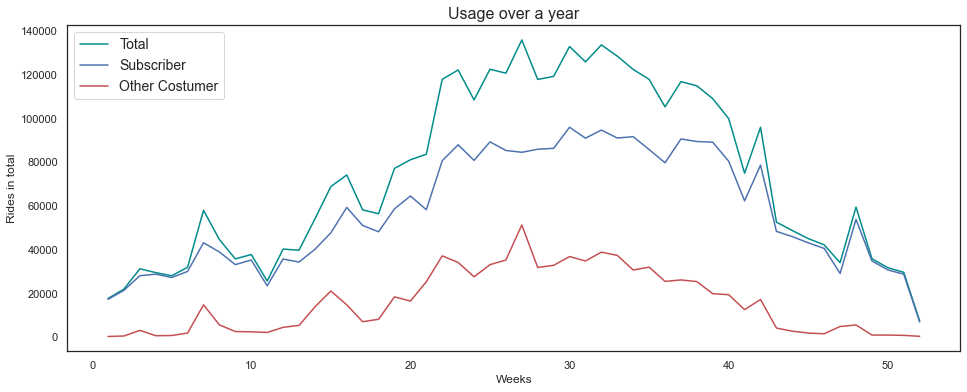

In [241]:
fig, ax = plt.subplots(figsize=(16,6))

ax.plot(chg17_usage, label="Total", color='darkcyan')
ax.plot(chg17_usage_subs, label="Subscriber", color='b')
ax.plot(chg17_usage_costu, label="Other Costumer", color='r')

ax.set_title("Usage over a year", fontsize=16)
ax.set_ylabel("Rides in total")
ax.set_xlabel("Weeks")
ax.legend(fontsize=14, loc="upper left")
plt.show()

In [117]:
chg17_usage = chg17_timeStamps.groupby(["date","month"])["bike_id"].nunique()
chg17_usage = pd.DataFrame(chg17_usage)

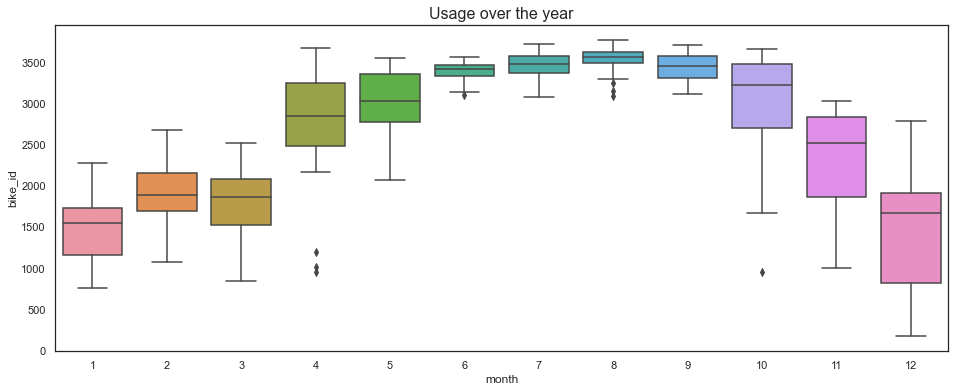

In [118]:
fig, ax = plt.subplots(figsize=(16,6))

sns.boxplot(x = chg17_usage.index.get_level_values(1),
            y = chg17_usage["bike_id"],
            ax=ax)
ax.set_title("Usage over the year", fontsize=16)
plt.show()

Then we take a look at some usage data per individual day. We compare each week day to each other

In [243]:
chg17_usage = chg17_timeStamps.groupby(["date","weekday"])["bike_id"].nunique()
chg17_usage = pd.DataFrame(chg17_usage)

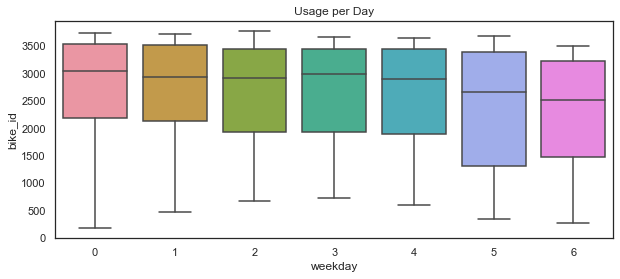

In [244]:
fig, ax = plt.subplots(figsize=(10,4))

sns.boxplot(x = chg17_usage.index.get_level_values(1),
            y = chg17_usage["bike_id"],
            ax=ax)
ax.set_title("Usage per Day")
plt.show()

We continue with some analyses of the usage over the day

In [119]:
chg17_usage = chg17_timeStamps.groupby(["date","hour"])["bike_id"].nunique()
chg17_usage = pd.DataFrame(chg17_usage)

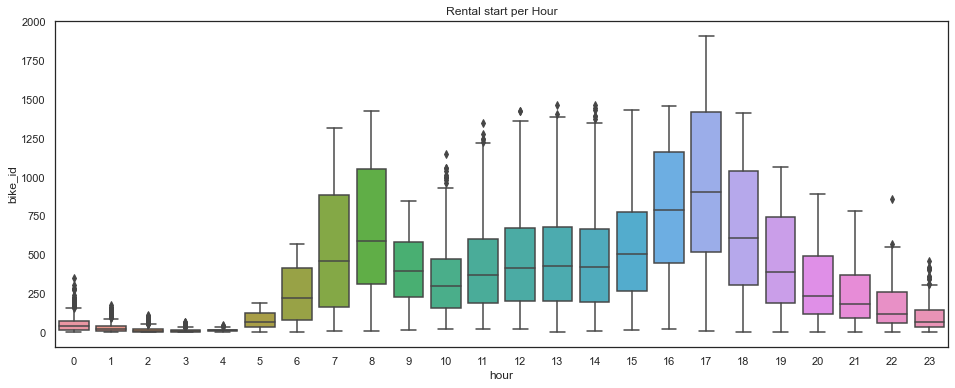

In [120]:
fig, ax = plt.subplots(figsize=(16,6))

sns.boxplot(x = chg17_usage.index.get_level_values(1),
            y = chg17_usage["bike_id"],
            ax=ax)
ax.set_title("Rental start per Hour")
plt.show()

### We now take a look at availability time
#### Time where the product is not in use is often very important

In [140]:
chg17_bikes = chg17["bike_id"].nunique()
chg17_bikes

6243

In [142]:
chg17_avail = chg17_timeStamps.copy()

In [149]:
chg17_avail.sort_values(["bike_id","date"], inplace=True)

In [150]:
chg17_avail.head()

,start_time,end_time,start_station_id,end_station_id,start_station_name,end_station_name,bike_id,user_type,date,travel_time,hour,weekday,week,month
394862,2017-01-13 19:06:32,2017-01-13 19:18:32,91,331,Clinton St & Washington Blvd,Halsted St & Blackhawk St (*),1,Subscriber,2017-01-13,0 days 00:12:00,19,4,2,1
395107,2017-01-13 18:04:29,2017-01-13 18:15:04,52,91,Michigan Ave & Lake St,Clinton St & Washington Blvd,1,Subscriber,2017-01-13,0 days 00:10:35,18,4,2,1
392936,2017-01-14 17:03:14,2017-01-14 17:16:19,331,212,Halsted St & Blackhawk St (*),Orleans St & Ohio St,1,Subscriber,2017-01-14,0 days 00:13:05,17,5,2,1
391617,2017-01-15 12:47:34,2017-01-15 12:57:51,212,49,Orleans St & Ohio St,Dearborn St & Monroe St,1,Subscriber,2017-01-15,0 days 00:10:17,12,6,2,1
387709,2017-01-17 08:39:23,2017-01-17 08:44:22,148,335,State St & 33rd St,Calumet Ave & 35th St,1,Subscriber,2017-01-17,0 days 00:04:59,8,1,3,1


In [151]:
chg17_avail2 = chg17_avail.groupby(["date","bike_id"])["travel_time"].sum()
chg17_avail2 = pd.DataFrame(chg17_avail2)
chg17_avail2.head(20)

travel_time
date       bike_id                
2017-01-01 8       0 days 00:16:18
           27      0 days 00:21:10
           31      0 days 00:15:42
           46      0 days 00:12:15
           57      0 days 00:06:56
           87      0 days 00:05:28
           89      0 days 00:59:33
           92      0 days 00:17:34
           99      0 days 00:02:58
           120     0 days 00:15:13
           121     0 days 00:11:10
           129     0 days 00:21:44
           140     0 days 00:57:14
           143     0 days 00:21:55
           145     0 days 00:35:08
           160     0 days 00:09:34
           164     0 days 00:05:09
           182     0 days 00:33:11
           183     0 days 00:16:25
           189     0 days 00:09:52